# **Task 2: Exploratory Data Analysis on Titanic Dataset**

In [7]:
from google.colab import files

# Upload train.csv and test.csv
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [8]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.head())
print(test.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

**Setup & Dataset** **Load**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Titanic dataset load (Kaggle / Seaborn built-in)
titanic = sns.load_dataset("titanic")

# First few rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Summary** **Statistics**

In [10]:
# Numeric columns ke summary stats
summary_stats = titanic.describe()

# Non-numeric columns ke counts
categorical_summary = titanic.describe(include=["object", "category"])

print("📊 Numeric Summary:")
print(summary_stats)

print("\n📊 Categorical Summary:")
print(categorical_summary)


📊 Numeric Summary:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

📊 Categorical Summary:
         sex embarked  class  who deck  embark_town alive
count    891      889    891  891  203          889   891
unique     2        3      3    3    7            3     2
top     male        S  Third  man    C  Southampton    no
freq     577      644  

**Group-Based Insights (Survival by Gender/Class)**

In [11]:
# Survival rate by gender
survival_by_gender = titanic.groupby("sex")["survived"].mean() * 100

# Survival rate by class
survival_by_class = titanic.groupby("class")["survived"].mean() * 100

print("Survival % by Gender:")
print(survival_by_gender)

print("\nSurvival % by Class:")
print(survival_by_class)


Survival % by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

Survival % by Class:
class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64


/tmp/ipython-input-3328186383.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = titanic.groupby("class")["survived"].mean() * 100


**Visualization: (a) Survival by Gender**

/tmp/ipython-input-3805719477.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="survived", data=titanic, ci=None)


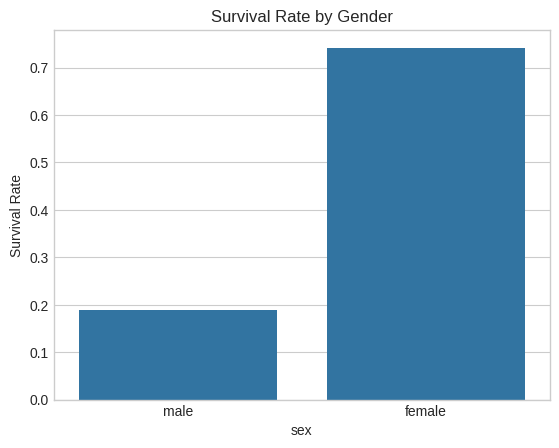

In [12]:
sns.barplot(x="sex", y="survived", data=titanic, ci=None)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


**Visualization: (b) Survival by Class**

/tmp/ipython-input-4213885488.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="class", y="survived", data=titanic, ci=None)


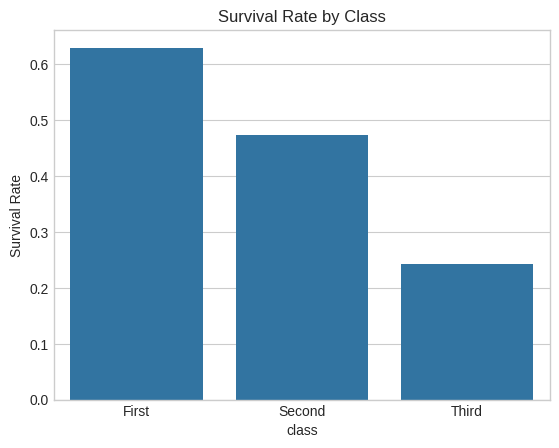

In [13]:
sns.barplot(x="class", y="survived", data=titanic, ci=None)
plt.title("Survival Rate by Class")
plt.ylabel("Survival Rate")
plt.show()


**(c) Correlation Heatmap (Numeric Variables)**

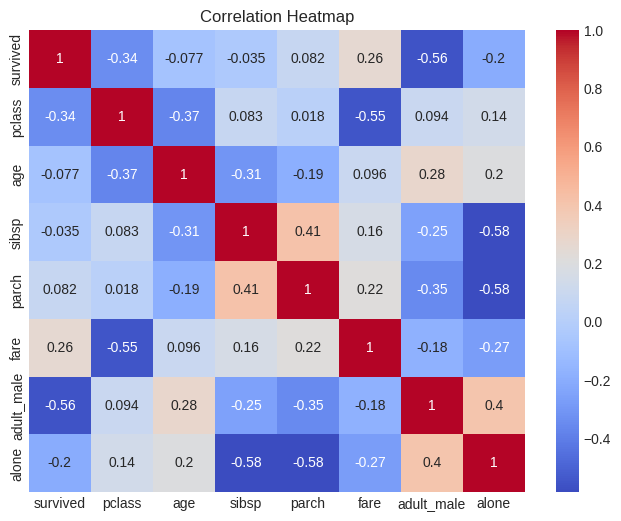

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Survival by Gender & Class**

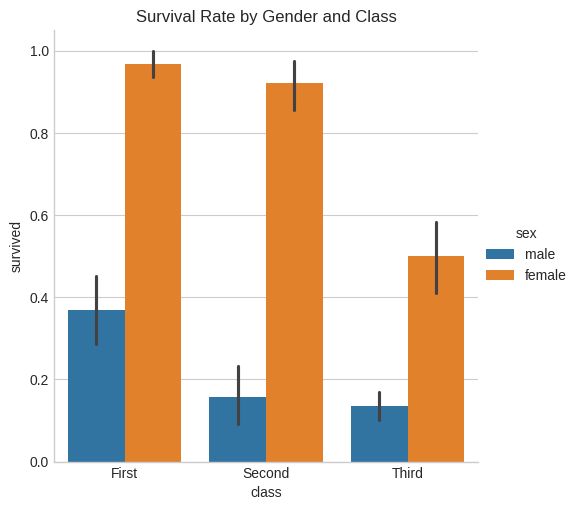

In [15]:
sns.catplot(x="class", y="survived", hue="sex", data=titanic, kind="bar", height=5)
plt.title("Survival Rate by Gender and Class")
plt.show()
